In [1]:
import os
import sys
from pathlib import Path

if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("working dir:", workding_dir)

working dir: /home/inflaton/code/CrediNews


In [2]:
# Import necessary libraries

# Data manipulation
import pandas as pd
import numpy as np

# Statistical functions
from scipy.stats import zscore

# For concurrency (running functions in parallel)
from concurrent.futures import ThreadPoolExecutor

# For caching (to speed up repeated function calls)
from functools import lru_cache

# For progress tracking
from tqdm import tqdm


# Text Preprocessing and NLP
import nltk

# Stopwords (common words to ignore) from NLTK
from nltk.corpus import stopwords

# Tokenizing sentences/words
from nltk.tokenize import word_tokenize

# Part-of-speech tagging
from nltk import pos_tag

# Lemmatization (converting words to their base form)
from nltk.stem import WordNetLemmatizer

# Data Preparation (Loading CSV)

Load the processed_data `csv` file into pandas DataFrames
- `processed_data.csv` is loaded into `data` DataFrame (stemming has been performed to reduce processing time.)

In [3]:
data = pd.read_csv("./processed_data.csv")

In [4]:
data["label"].value_counts()

label
0    34770
1    28162
Name: count, dtype: int64

In [5]:
data.info()
print("Dataframe Shape:", data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62932 entries, 0 to 62931
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   label                   62932 non-null  int64 
 1   full_content            62932 non-null  object
 2   processed_full_content  62932 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
Dataframe Shape: (62932, 3)


In [6]:
data["word_count"] = data["full_content"].apply(lambda x: len(str(x).split()))

In [7]:
data.describe()

,label,word_count
count,62932.000000,62932.000000
mean,0.447499,504.565324
std,0.497240,394.809470
min,0.000000,1.000000
25%,0.000000,237.000000
50%,0.000000,409.000000
75%,1.000000,664.000000
max,1.000000,2788.000000


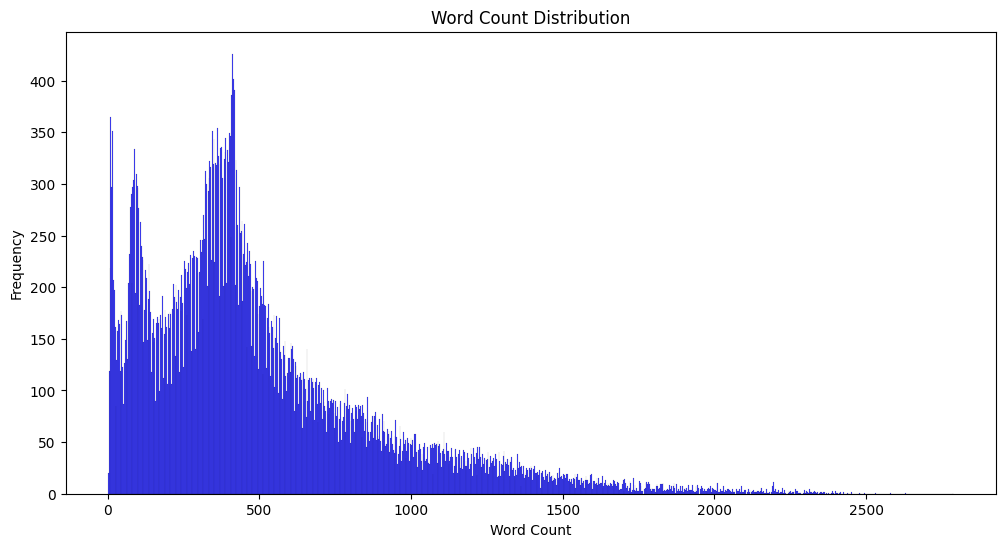

In [8]:
# draw a histogram of the word count
import matplotlib.pyplot as plt
import seaborn as sns


def plot_word_count_distribution(data):
    plt.figure(figsize=(12, 6))
    sns.histplot(data["word_count"], bins=1000, color="blue")
    plt.title("Word Count Distribution")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.show()


plot_word_count_distribution(data)

In [9]:
data[data["word_count"] < 20]

,label,full_content,processed_full_content,word_count
1,1,Did they post their votes for Hillary already?,post vote hillari alreadi,8
7,1,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,hous intel chair trump-russia fake stori “ no ...,12
41,1,True. Hillary needs a distraction and what bet...,true hillari need distract better real `` wag ...,16
44,0,Mayday on the Carolina Queen - The New York Times,mayday carolina queen new york time,10
77,1,Be the First to Comment! Search articles ‘Ar...,first comment search articl ‘ arab spring ’ wa...,13
...,...,...,...,...
62650,0,100 Notable Books of 2016 - The New York Times,100 notabl book 2016 new york time,10
62714,1,Israel: Ancient Papyrus Proves Jerusalem Belon...,israel ancient papyru prove jerusalem belong i...,8
62791,1,Strange People Who Shifted to Other Dimensions,strang peopl shift dimens,7
62853,1,BOOM! Woman Tries To Steal TRUMP Signs BUT Thi...,boom woman tri steal trump sign but guy readi ...,15


In [10]:
data[data["word_count"] == 20]

,label,full_content,processed_full_content,word_count
676,1,She is a total Idiot. How did she ever get tha...,total idiot ever get job oh forgot work,20
955,1,Comment on Mass Fish Deaths: Millions Have Bee...,comment mass fish death million found dead wor...,20
2167,1,Support Us UNAIRED Documentary Illuminati Chil...,support us unair documentari illuminati child ...,20
2284,1,source Add To The Conversation Using Facebook ...,sourc add convers use facebook comment hot bil...,20
4632,1,Wow! The Dems are so out of touch NO KIDDING...,wow dem touch no kid ’ hillari support get us ...,20
6375,1,"Furious Dollar Rally Fizzles On ""Black Friday""...",furiou dollar ralli fizzl `` black friday '' u...,20
6850,1,WATCH TUCKER CARLSON Face Off With New York Ti...,watch tucker carlson face new york time editor...,20
7491,1,"TRUMP ROCKS MASSIVE PENSACOLA, FL RALLY: “The ...",trump rock massiv pensacola fl ralli “ citizen...,20
8178,1,CLOAKED IN CONSPIRACY: Overview of JFK Files R...,cloak conspiraci overview jfk file reopen door...,20
9467,0,"232 photos, 131 quotes and 43 numbers that tel...",232 photo 131 quot 43 number tell stori americ...,20


In [11]:
data[data["word_count"] == 30]

,label,full_content,processed_full_content,word_count
994,1,"Weak. Why not just own that your whole ""hey, w...",weak not whole `` hey weather not climat '' co...,30
1721,1,"Keep in mind, a group funded by one of Hillary...",keep mind group fund one hillari barack obama ...,30
1971,1,"A 23 kiloton tower shot called BADGER, fired o...",23 kiloton tower shot call badger fire april 1...,30
9524,1,reports on What You Need to Know About the 'Al...,report need know 'alt right get new amtv coffe...,30
10081,0,Donald Trump received a key endorsement for hi...,donald trump receiv key endors immigr platform...,30
17209,1,The left has had control and the narrative for...,left control narr waaaay long patriot 100 fed ...,30
21111,1,Notice how the left is still pushing the false...,notic left still push fals narr russian hack e...,30
22001,1,Here s Obama defending Russia during a debate ...,obama defend russia debat call romney say russ...,30
24668,0,Who has Trump picked for his Cabinet so far?\n...,trump pick cabinet far donald trump fill put w...,30
27305,1,In case you missed the ridiculous display by L...,case miss ridicul display liz warren senat flo...,30


In [12]:
data[data["word_count"] == 40]

,label,full_content,processed_full_content,word_count
406,1,BRACE Yourself! What Happens In Under 2 Weeks ...,brace happen 2 week bad elit drop paramount el...,40
529,1,Mark Ruffalo is one the movie industry’s most ...,mark ruffalo one movi industri ’ outspoken adv...,40
3194,1,The Bureau of Land Management (BLM) claims to ...,bureau land manag blm claim manag public land ...,40
4487,1,In the wake of the recent acquittal of the Bun...,wake recent acquitt bundi brother co-conspir m...,40
4892,1,Col Oliver North lists the 5 irrefutable facts...,col oliv north list 5 irrefut fact confirm oba...,40
7542,1,A new report shows that the New York Times ‘ p...,new report show new york time ‘ profit freefal...,40
8297,1,"Thanks to the intelligent use of technology, t...",thank intellig use technolog world ’ ocean alr...,40
9834,0,President Barack Obama held a meeting with six...,presid barack obama held meet six illeg immigr...,40
10508,1,Kids should be learning the benefits of capita...,kid learn benefit capit school reason america ...,40
10688,1,Next Swipe left/right 10 tips to improve your ...,next swipe left/right 10 tip improv life 117 t...,40


In [13]:
data[data["word_count"] == 50]

,label,full_content,processed_full_content,word_count
354,1,The video below is a great snapshot of what wa...,video great snapshot go clinton foundat huge d...,50
2466,1,Wow! These are not good numbers for Hillary in...,wow not good number hillari state democrat win...,50
7424,0,WASHINGTON (Reuters) - U.S. President Donald T...,washington reuter u.s. presid donald trump rus...,50
7712,0,LONDON (Reuters) - Scotland s parliament was e...,london reuter scotland parliament evacu tuesda...,50
7959,1,Now it is USA Today Lying to us that the Anti-...,usa today lie us anti-trump protest spontan ht...,50
8243,0,MOSCOW (Reuters) - Russia s air force has kill...,moscow reuter russia air forc kill 850 milit s...,50
8424,1,After Donald Trump’s political-world-shatterin...,donald trump ’ political-world-shatt upset hil...,50
9503,1,330 American soldiers are causing the Russians...,330 american soldier caus russian prepar nucle...,50
10301,1,Abedin & Weiner to Testify Against Clinton \n\...,abedin weiner testifi clinton huma abedin hill...,50
15588,0,MOSCOW (Reuters) - Russian Foreign Minister Se...,moscow reuter russian foreign minist sergei la...,50


In [14]:
data[data["word_count"] > 2000]

,label,full_content,processed_full_content,word_count
79,1,Email \nWhen she stumbled across massive corru...,email stumbl across massiv corrupt made-up sta...,2158
122,0,Donald J. Trump declared a $916 million loss o...,donald j. trump declar 916 million loss 1995 i...,2345
277,1,"Without intention, Mike kind fulfills the prov...",without intent mike kind fulfil proverb not wa...,2021
477,1,Chicago Cubs first baseman Anthony Rizzo stepp...,chicago cub first baseman anthoni rizzo step m...,2004
760,1,Barack Obama and the Democrat party would like...,barack obama democrat parti would like us go w...,2084
...,...,...,...,...
62518,1,"Eric Zuesse First, the context in which the is...",eric zuess first context issu war russia rais ...,2278
62592,1,"By Brig Asif H. Raja on November 3, 2016 \nAsi...",brig asif h. raja novemb 3 2016 asif haroon ra...,2221
62814,1,by Outis Philalithopoulos In yesterday’s episo...,outi philalithopoulo yesterday ’ episod seri o...,2304
62888,1,Here's something interesting from The Unz Revi...,'s someth interest unz review ... recipi name ...,2398


In [15]:
df = data[data["word_count"] >= 30][data["word_count"] <= 2000].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60491 entries, 0 to 62931
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   label                   60491 non-null  int64 
 1   full_content            60491 non-null  object
 2   processed_full_content  60491 non-null  object
 3   word_count              60491 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


/tmp/ipykernel_1779884/4090430507.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = data[data["word_count"] >= 30][data["word_count"] <= 2000].copy()


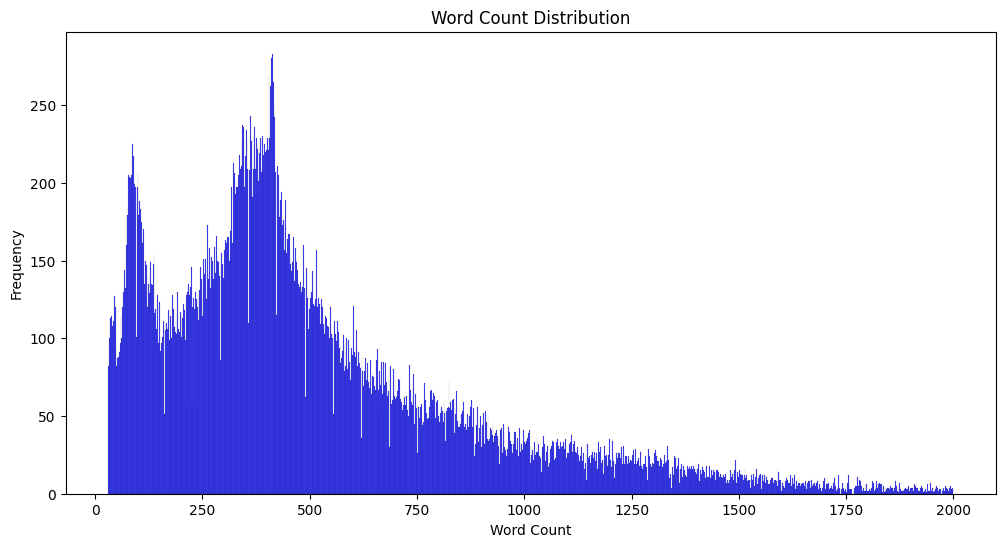

In [16]:
plot_word_count_distribution(df)

In [17]:
df.describe()

,label,word_count
count,60491.000000,60491.000000
mean,0.437437,510.965334
std,0.496075,369.558009
min,0.000000,30.000000
25%,0.000000,259.000000
50%,0.000000,415.000000
75%,1.000000,671.000000
max,1.000000,2000.000000


In [18]:
df.to_csv("./processed_data_filtered.csv", index=False)

In [19]:
df.iloc[-1]

label                                                                     0
full_content              MEXICO CITY (Reuters) - Donald Trump’s combati...
processed_full_content    mexico citi reuter donald trump ’ comb style b...
word_count                                                              569
Name: 62931, dtype: object

In [20]:
news = df["full_content"].iloc[-1]
print(news)

MEXICO CITY (Reuters) - Donald Trump’s combative style has buffeted Mexico’s president for months, but deeply unpopular Enrique Pena Nieto may end up thanking the new U.S. president for prompting offended Mexicans to rally behind their leader.  From billionaire business magnate Carlos Slim to political opponents, there has been a groundswell of support for Pena Nieto, who has cut a lonely figure in months of bruising encounters with Trump. Often referred to by his initials EPN, Pena Nieto is laboring under the worst approval ratings of any Mexican president in decades due to discontent over corruption, gang violence, sluggish growth and a jump in fuel prices.     Trump’s threats to scrap the NAFTA trade deal with Mexico and build a border wall have caused anger and left Mexicans feeling fearful for the future. His challenge to Pena Nieto on Thursday - saying he should skip a planned summit between the two leaders if Mexico wasn’t willing to pay for the wall - was the final straw. Pena 

In [21]:
import json

idx = json.load(open("results/train_val_idx.json"))
idx.keys()

dict_keys(['train_idx', 'val_idx'])

In [22]:
df_train = df.iloc[idx["train_idx"]].copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54441 entries, 0 to 62931
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   label                   54441 non-null  int64 
 1   full_content            54441 non-null  object
 2   processed_full_content  54441 non-null  object
 3   word_count              54441 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.1+ MB


In [23]:
df_train = df_train[["label", "full_content"]]

df_train.to_csv("./train_data.csv", index=False)

In [24]:
df_test = df.iloc[idx["val_idx"]].copy()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6050 entries, 11 to 62922
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   label                   6050 non-null   int64 
 1   full_content            6050 non-null   object
 2   processed_full_content  6050 non-null   object
 3   word_count              6050 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 236.3+ KB


In [25]:
df_test = df_test[["label", "full_content"]]

df_test.to_csv("./test_data.csv", index=False)